In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

In [2]:
# Load dataset
DATASET_PATH = r"C:\Users\Andrewinnn\Downloads\garbage-dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print(f"Kelas dalam dataset: {class_names}")

Found 13037 files belonging to 7 classes.
Using 10430 files for training.
Found 13037 files belonging to 7 classes.
Using 2607 files for validation.
Kelas dalam dataset: ['battery', 'biological', 'cardboard', 'clothes', 'metal', 'shoes', 'trash']


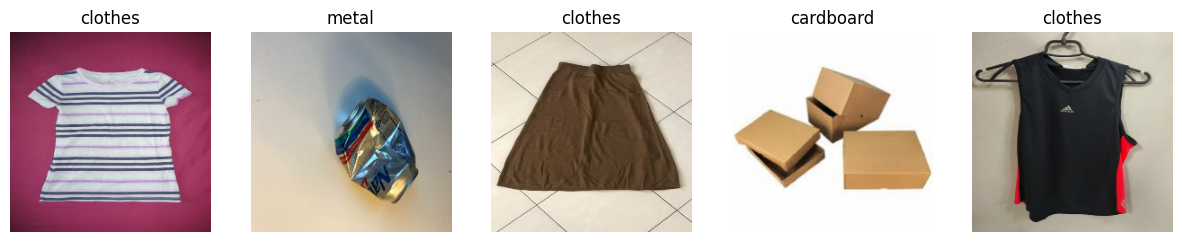

In [3]:
# Menampilkan contoh gambar dari dataset
import matplotlib.pyplot as plt

def show_sample_images(dataset, num_images=5):
    plt.figure(figsize=(15, 15))
    
    for i, (images, labels) in enumerate(dataset.take(1)):
        for j in range(num_images):
            ax = plt.subplot(1, num_images, j + 1)
            plt.imshow(images[j].numpy().astype("uint8"))
            plt.title(class_names[labels[j]])
            plt.axis("off")
    plt.show()

show_sample_images(train_ds, num_images=5)


In [4]:
# Normalisasi dataset
autotune = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=autotune)
val_ds = val_ds.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=autotune)

In [5]:
# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [6]:
# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(len(class_names), activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Epoch 1/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 246s 729ms/step - accuracy: 0.8029 - loss: 0.6207 - val_accuracy: 0.9494 - val_loss: 0.1544
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 236s 724ms/step - accuracy: 0.9568 - loss: 0.1475 - val_accuracy: 0.9636 - val_loss: 0.1206
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 229s 704ms/step - accuracy: 0.9648 - loss: 0.1152 - val_accuracy: 0.9609 - val_loss: 0.1177
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 230s 705ms/step - accuracy: 0.9696 - loss: 0.0932 - val_accuracy: 0.9674 - val_loss: 0.1075
Epoch 5/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 225s 690ms/step - accuracy: 0.9719 - loss: 0.0844 - val_accuracy: 0.9678 - val_loss: 0.1066
Epoch 6/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 222s 681ms/step - accuracy: 0.9774 - loss: 0.0758 - val_accuracy: 0.9655 - val_loss: 0.1132
Epoch 7/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 220s 676ms/step - accuracy: 0.9787 - loss: 0.0655 - val_accuracy: 0.9701 - val_loss: 0.1056
Epoch 8/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 220s 675ms/step - accuracy: 0.9826 -

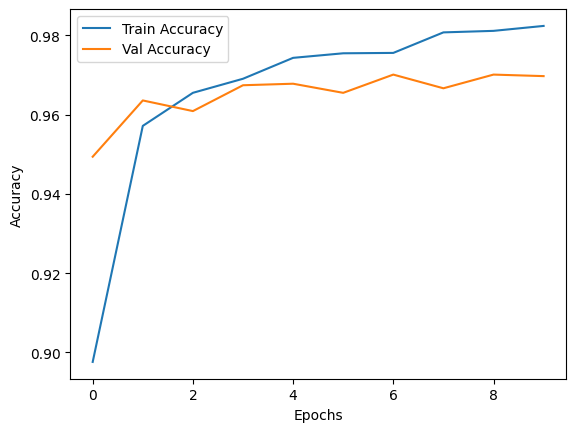

In [7]:
# Train model
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# Evaluate model
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 536ms/step - accuracy: 0.9717 - loss: 0.1057
Validation Accuracy: 0.9697


In [9]:
model.save("garbage_classifier_mobilenet.keras")

In [10]:
# Prediksi contoh gambar
def predict_image(img_path, model):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class = class_names[tf.argmax(prediction[0])]
    print(f"Predicted Class: {predicted_class}")

In [ ]:
# Contoh pemakaian:
# predict_image("path/to/sample_image.jpg", model)

predict_image(r"<image path here>", model)